**Грамматический анализатор**

Евгений Борисов <esborisov@sevsu.ru>

синтаксические парсеры библиотеки NLTK

---

Синтаксический анализ в NLTK.   
https://habr.com/ru/post/340574/   
https://habr.com/ru/post/342162/      

Steven Bird, Ewan Klein, and Edward Loper  Natural Language Processing with Python.   
chapter 9. Building Feature Based Grammars.   
https://www.nltk.org/book/ch09.html

----

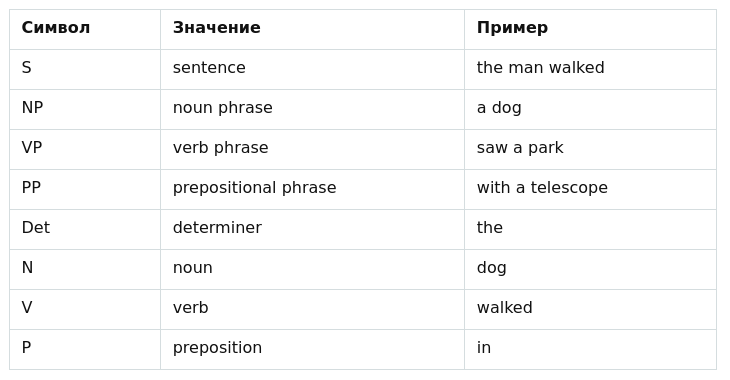

In [24]:
from nltk import CFG # Context-free grammar

grammar = CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | Det N PP | 'I'
 VP -> V NP | VP PP
 Det -> 'an' | 'my'
 N -> 'elephant' | 'pajamas'
 V -> 'shot'
 P -> 'in'
 """)

grammar, grammar.start(), grammar.productions() 

(<Grammar with 13 productions>,
 S,
 [S -> NP VP,
  PP -> P NP,
  NP -> Det N,
  NP -> Det N PP,
  NP -> 'I',
  VP -> V NP,
  VP -> VP PP,
  Det -> 'an',
  Det -> 'my',
  N -> 'elephant',
  N -> 'pajamas',
  V -> 'shot',
  P -> 'in'])

In [25]:
# from IPython.display import display
# !pip install svgling

In [26]:
from nltk import ChartParser as Parser

tokens = 'I shot an elephant in my pajamas'.split()

for tree in Parser(grammar).parse(tokens):  
    tree.pretty_print()
#     display(tree)
    

     S                                       
  ___|______________                          
 |                  VP                       
 |         _________|__________               
 |        VP                   PP            
 |    ____|___              ___|___           
 |   |        NP           |       NP        
 |   |     ___|_____       |    ___|_____     
 NP  V   Det        N      P  Det        N   
 |   |    |         |      |   |         |    
 I  shot  an     elephant  in  my     pajamas

     S                                   
  ___|__________                          
 |              VP                       
 |    __________|______                   
 |   |                 NP                
 |   |     ____________|___               
 |   |    |     |          PP            
 |   |    |     |       ___|___           
 |   |    |     |      |       NP        
 |   |    |     |      |    ___|_____     
 NP  V   Det    N      P  Det        N   
 |   |    |     |    

In [27]:
from nltk import CFG # Context-free grammar

grammar = CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | Det N PP | 'Я'
 VP -> V NP | VP PP
 Det -> 'того' | 'моей'
 N -> 'слона' | 'пижаме'
 V -> 'подстрелил'
 P -> 'в'
 """)

grammar, grammar.start(), grammar.productions() 

(<Grammar with 13 productions>,
 S,
 [S -> NP VP,
  PP -> P NP,
  NP -> Det N,
  NP -> Det N PP,
  NP -> 'Я',
  VP -> V NP,
  VP -> VP PP,
  Det -> 'того',
  Det -> 'моей',
  N -> 'слона',
  N -> 'пижаме',
  V -> 'подстрелил',
  P -> 'в'])

In [28]:
tokens = 'Я подстрелил того слона в моей пижаме'.split()
for tree in Parser(grammar).parse(tokens):  
    tree.pretty_print()

        S                                        
  ______|_________________                        
 |                        VP                     
 |               _________|________               
 |              VP                 PP            
 |       _______|____           ___|____          
 |      |            NP        |        NP       
 |      |        ____|____     |    ____|____     
 NP     V      Det        N    P  Det        N   
 |      |       |         |    |   |         |    
 Я  подстрелил того     слона  в  моей     пижаме

        S                                    
  ______|_____________                        
 |                    VP                     
 |       _____________|____                   
 |      |                  NP                
 |      |        __________|___               
 |      |       |     |        PP            
 |      |       |     |     ___|____          
 |      |       |     |    |        NP       
 |      |       |     |   

In [ ]:
# sentence = 'c 20 января по 30 марта'


# grammar = CFG.fromstring("""
#  S -> NP VP
#  PP -> P NP
#  NP -> Det N | Det N PP | 'Я'
#  VP -> V NP | VP PP
#  Det -> 'того' | 'моей'
#  N -> 'слона' | 'пижаме'
#  V -> 'подстрелил'
#  P -> 'в'
#  """)


In [32]:
# nltk.app.rdparser() # parser demo

# https://www.nltk.org/book/ch08.html


---

In [ ]:
# import  nltk
# from nltk import load_parser
# cp = load_parser('grammars/book_grammars/sql0.fcfg')
# query = 'What cities are located in China'
# for tree in cp.parse(query.split()): print(tree)

In [28]:
# from nltk import CFG

# grammar = CFG.fromstring("""
# S -> NP VP
# PP -> P NP
# NP -> Det N | NP PP
# VP -> V NP | VP PP
# Det -> 'a' | 'the'
# N -> 'dog' | 'cat'
# V -> 'chased' | 'sat'
# P -> 'on' | 'in'
# """)

In [29]:
# from nltk.parse import load_parser
# load_parser?

In [34]:
# # >>> nltk.data.show_cfg('grammars/book_grammars/feat0.fcfg')

# from nltk import FeatureGrammar


# grammar_description = """
# % start S
# # ###################
# # Grammar Productions
# # ###################
# # S expansion productions
# S -> NP[NUM=?n] VP[NUM=?n]
# # NP expansion productions
# NP[NUM=?n] -> N[NUM=?n]
# NP[NUM=?n] -> PropN[NUM=?n]
# NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
# NP[NUM=pl] -> N[NUM=pl]
# # VP expansion productions
# VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
# VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP
# # ###################
# # Lexical Productions
# # ###################
# Det[NUM=sg] -> 'this' | 'every'
# Det[NUM=pl] -> 'these' | 'all'
# Det -> 'the' | 'some' | 'several'
# PropN[NUM=sg]-> 'Kim' | 'Jody'
# N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
# N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children'
# IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
# TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'
# IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
# TV[TENSE=pres, NUM=pl] -> 'see' | 'like'
# IV[TENSE=past] -> 'disappeared' | 'walked'
# TV[TENSE=past] -> 'saw' | 'liked'
# """

# grammar = FeatureGrammar.fromstring()


In [36]:
# nltk.data.load(grammar_description)

In [5]:
# from nltk import word_tokenize as tokenize
# sentence = 'Today morning, Arthur felt very good.'
# nltk.pos_tag(  nltk.word_tokenize(sentence), lang='eng')

---

In [37]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
""")

print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


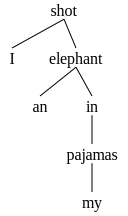

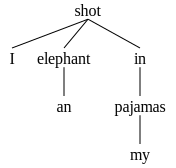

In [40]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
#     tree.pretty_print()
    display(tree)
